In [43]:
import pandas
import numpy

import random

import matplotlib.pyplot as plt


In [6]:
MAX_ROWS = 1000000000
df_raw = pandas.read_csv("../data/raw/train_ver2.csv", nrows=MAX_ROWS)

C:\Users\Latitude\AppData\Local\Temp\ipykernel_2312\2414739933.py:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pandas.read_csv("../data/raw/train_ver2.csv", nrows=MAX_ROWS)


In [7]:
columns = ['sexo', 'antiguedad', 'age', 'renta'] + list(df_raw.columns[24:])
df_to_segment = df_raw.sample(n=10000)[columns]
df_to_segment.head()

,sexo,antiguedad,age,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
6963210,V,191,52,179449.98,0,0,0,0,1,0,...,0,0,0,1,1,1,0,1.0,1.0,1
2751221,H,22,28,76842.63,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
9935503,V,42,33,158958.72,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1.0,1.0,1
1520436,H,152,43,71874.03,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
11859749,V,133,43,NaN,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,1


In [8]:
productwise_fav = round(100*df_to_segment.iloc[:, 4:].sum()/df_to_segment.shape[0], 2)
interested_products = list(productwise_fav[productwise_fav>8].keys())

In [9]:
df_to_segment = df_to_segment[['sexo', 'antiguedad', 'age'] + interested_products]
df_to_segment.head()

,sexo,antiguedad,age,ind_cco_fin_ult1,ind_cno_fin_ult1,ind_ctop_fin_ult1,ind_ecue_fin_ult1,ind_recibo_ult1
6963210,V,191,52,0,1,0,1,1
2751221,H,22,28,1,0,0,0,0
9935503,V,42,33,0,1,0,0,1
1520436,H,152,43,1,0,0,0,0
11859749,V,133,43,1,0,1,0,1


In [10]:
def impute_median(df, column_name):
    """
    This function will impute string 'NA' with the median value
    :param df:
    :param column_name:
    :return:
    """
    # cleaning for Customer seniority
    median_value = df[~df[column_name].str.contains('NA', na=False)][column_name].astype(float).astype(int).median()
    df.loc[df[column_name].str.contains('NA', na=False), column_name] = median_value
    df[column_name] = df[column_name].astype(float).astype(int)
    return df

In [11]:
df_to_segment['sexo'] = df_to_segment['sexo'].fillna(random.choice(['V', 'H']))

In [12]:
# Cleaning antiguedad
df_to_segment = impute_median(df_to_segment, 'antiguedad')
# Cleaning age
df_to_segment = impute_median(df_to_segment, 'age')

In [15]:
df_clean.describe()

,antiguedad,age,ind_cco_fin_ult1,ind_cno_fin_ult1,ind_ctop_fin_ult1,ind_ecue_fin_ult1,ind_recibo_ult1
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,78.95670,40.282500,0.651200,0.080300,0.126900,0.080900,0.122300
std,66.01818,17.341429,0.476614,0.271771,0.332878,0.272695,0.327648
min,0.00000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.00000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.00000,39.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,133.00000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,254.00000,105.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
df_clean['sexo'] = pandas.get_dummies(df_clean['sexo'], drop_first=True).astype(int)

In [29]:
df_clean = (df_clean - df_clean.mean())/df_clean.std()

In [31]:
df_clean.describe()

,sexo,antiguedad,age,ind_cco_fin_ult1,ind_cno_fin_ult1,ind_ctop_fin_ult1,ind_ecue_fin_ult1,ind_recibo_ult1
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-1.318057e-16,1.705303e-17,1.563194e-17,-1.243450e-17,1.598721e-17,1.918465e-17,-1.740830e-17,-1.207923e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.096375e+00,-1.195984e+00,-2.207575e+00,-1.366304e+00,-2.954697e-01,-3.812213e-01,-2.966683e-01,-3.732660e-01
25%,-1.096375e+00,-8.475953e-01,-9.389365e-01,-1.366304e+00,-2.954697e-01,-3.812213e-01,-2.966683e-01,-3.732660e-01
50%,9.120056e-01,-4.234697e-01,-7.395584e-02,7.318285e-01,-2.954697e-01,-3.812213e-01,-2.966683e-01,-3.732660e-01
75%,9.120056e-01,8.186124e-01,5.603633e-01,7.318285e-01,-2.954697e-01,-3.812213e-01,-2.966683e-01,-3.732660e-01
max,9.120056e-01,2.651441e+00,3.731959e+00,7.318285e-01,3.384103e+00,2.622886e+00,3.370431e+00,2.678787e+00


In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(df_clean)

print(pca.explained_variance_ratio_.sum())

0.9146660556481911


In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(df_clean)
kmeans.cluster_centers_
kmeans.labels_

array([0, 1, 0, ..., 1, 1, 1])

C:\Users\Latitude\PycharmProjects\CustomerSegmentation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Latitude\PycharmProjects\CustomerSegmentation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Latitude\PycharmProjects\CustomerSegmentation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Latitude\PycharmProjects\CustomerSegmentation\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

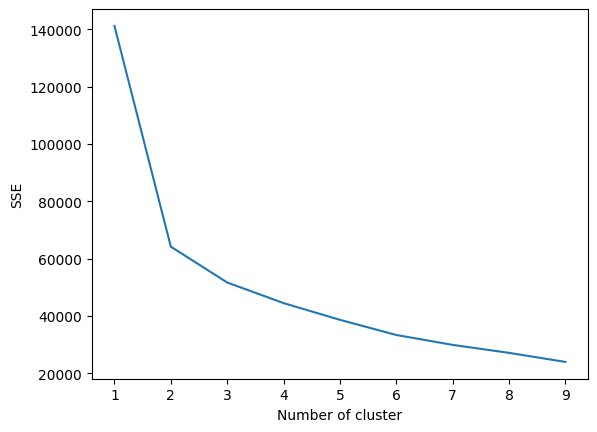

In [53]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(df_clean)
    df_clean["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [54]:
optimized_clusters = 3
kmeans = KMeans(n_clusters=optimized_clusters, random_state=0, n_init="auto").fit(df_clean)
df_clean['cluster'] = kmeans.labels_

In [55]:
df_clean['cluster'].value_counts()

cluster
2    5196
1    3629
0    1175
Name: count, dtype: int64

In [63]:
df_clean.iloc[:, ]

,sexo,antiguedad,age,ind_cco_fin_ult1,ind_cno_fin_ult1,ind_ctop_fin_ult1,ind_ecue_fin_ult1,ind_recibo_ult1,clusters
6963210,0.912006,1.697158,0.675694,-1.366304,3.384103,-0.381221,3.370431,2.678787,8
2751221,-1.096375,-0.862743,-0.708275,0.731829,-0.295470,-0.381221,-0.296668,-0.373266,3
9935503,0.912006,-0.559796,-0.419948,-1.366304,3.384103,-0.381221,-0.296668,2.678787,2
1520436,-1.096375,1.106412,0.156706,0.731829,-0.295470,-0.381221,-0.296668,-0.373266,5
11859749,0.912006,0.818612,0.156706,0.731829,-0.295470,2.622886,-0.296668,2.678787,0
...,...,...,...,...,...,...,...,...,...
11236950,0.912006,1.227591,0.618029,-1.366304,-0.295470,-0.381221,-0.296668,-0.373266,6
7134229,0.912006,0.879202,1.252348,-1.366304,-0.295470,2.622886,-0.296668,-0.373266,0
3207549,-1.096375,-0.696122,-0.996602,0.731829,-0.295470,-0.381221,-0.296668,-0.373266,3
145410,0.912006,-0.514354,-0.938936,0.731829,-0.295470,-0.381221,-0.296668,-0.373266,1


In [93]:
from sklearn.decomposition import PCA

df_to_pca = df_clean[[col for col in df_clean.columns if col != 'cluster']]
pca = PCA(n_components=2, random_state=0)
x_new = pca.fit_transform(df_to_pca)
print(pca.explained_variance_ratio_.sum())

0.5918008840989982


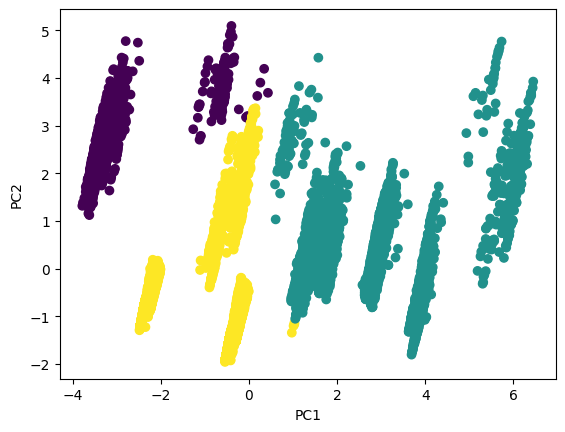

In [94]:
plt.scatter(x_new[:,0], x_new[:,1], c = df_clean['cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()